# Get BTH, ETH price

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt

start_date = "2021-08-26"
end_date = "2024-05-21"

btc_data = yf.download("BTC-USD", start=start_date, end=end_date)
eth_data = yf.download("ETH-USD", start=start_date, end=end_date)

btc_close = btc_data['Close']
eth_close = eth_data['Close']

btc_pct_change = btc_close.pct_change().fillna(0)
eth_pct_change = eth_close.pct_change().fillna(0)

btc_cum_growth = (1 + btc_pct_change).cumprod() - 1
eth_cum_growth = (1 + eth_pct_change).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


# Load news label

In [101]:
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = './news_data/news_with_label/cd_large.json'

with open(file_path, 'r', encoding='utf-8') as file:
    news_collection = json.load(file)

news_dates = []
news_values = []

for news in news_collection:
    news_dates.append(news["date"])
    label = news["label"]
    if label == "bullish":
        news_values.append(1)
    elif label == "bearish":
        news_values.append(-20)
    else:
        news_values.append(0)

news_dates = pd.to_datetime(news_dates)
news_df = pd.DataFrame({'Date': news_dates, 'Value': news_values})
news_df = news_df.groupby('Date').sum().reset_index()

# scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = StandardScaler()
news_df['Standardized_Value'] = scaler.fit_transform(news_df['Value'].values.reshape(-1, 1)) * 0.12


# Plot

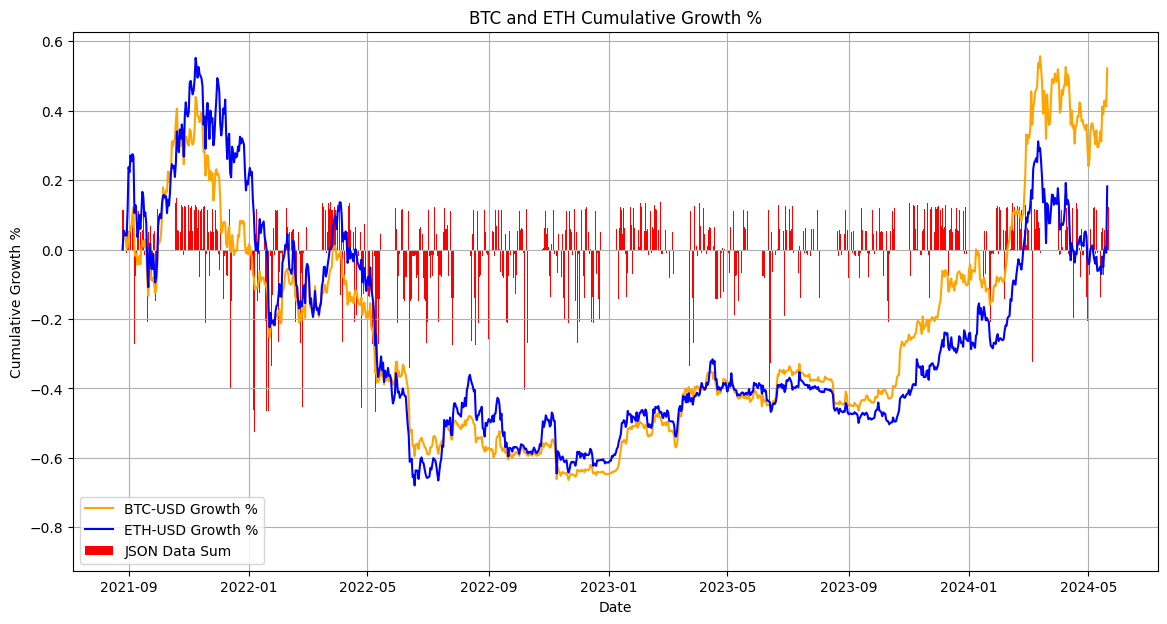

In [90]:
plt.figure(figsize=(14, 7))

plt.plot(btc_cum_growth, label='BTC-USD Growth %', color='orange')
plt.plot(eth_cum_growth, label='ETH-USD Growth %', color='blue')
plt.bar(news_df['Date'], news_df['Standardized_Value'], label='JSON Data Sum', color='red')

plt.title('BTC and ETH Cumulative Growth %')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth %')
plt.legend()
plt.grid(True)
plt.show()

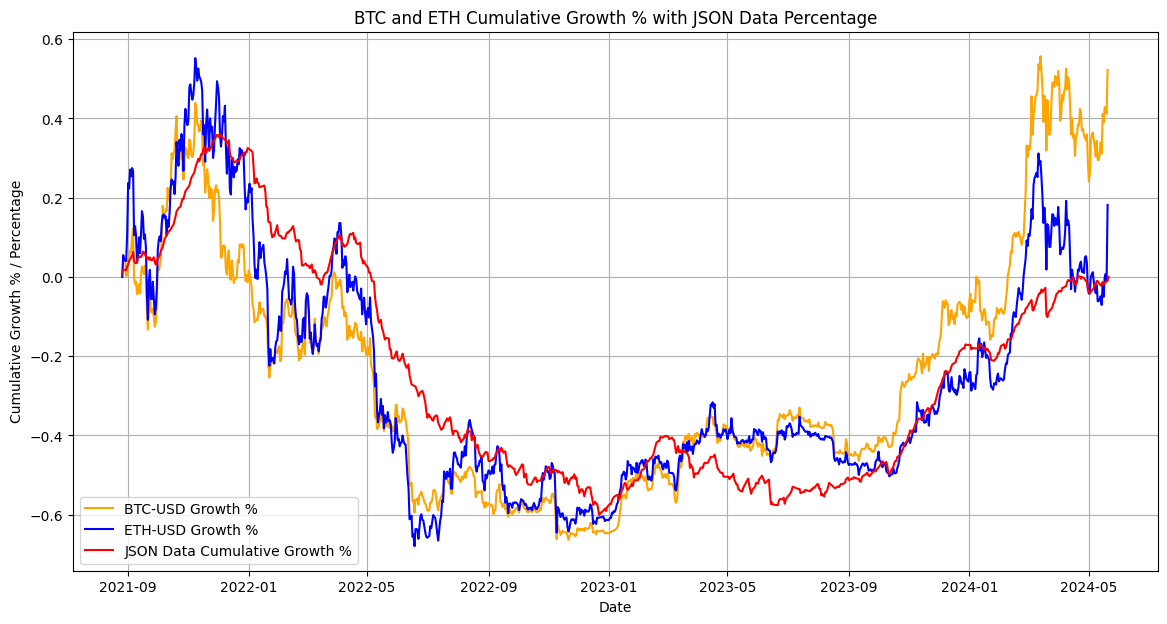

In [102]:
news_df["Cum_art"] = news_df["Standardized_Value"].cumsum() * 0.08

plt.figure(figsize=(14, 7))

plt.plot(btc_cum_growth, label='BTC-USD Growth %', color='orange')
plt.plot(eth_cum_growth, label='ETH-USD Growth %', color='blue')
plt.plot(news_df['Date'], news_df['Cum_art'], label='JSON Data Cumulative Growth %', color='red')

plt.title('BTC and ETH Cumulative Growth % with JSON Data Percentage')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth % / Percentage')
plt.legend()
plt.grid(True)
plt.show()

# Find proper parm 